## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [47]:
# Your code here - remember to use markdown cells for comments as well!

In [61]:
# Import necessary libraries
import pandas as pd             # For data manipulation and analysis
import matplotlib.pyplot as plt # For creating data visualizations
import numpy as np              # For numerical operations
import zipfile                  # For working with compressed files
import sqlite3                  # For working with SQLite databases
from collections import Counter
import seaborn as sns

# Enable inline plotting for Jupyter Notebook or Jupyter Lab
%matplotlib inline

# Set an option to display all columns when viewing DataFrames
pd.set_option('display.max_columns', None)

## Tomato Data


In [49]:
reviews = pd.read_csv('zippedData\\rt.reviews.tsv.gz', sep='\t', compression='gzip', encoding='latin1')
movie_info = pd.read_csv('zippedData\\rt.movie_info.tsv.gz', sep='\t', compression='gzip', encoding='latin1')

In [50]:
tomatodata = pd.merge(reviews, movie_info, on= 'id', how = 'left')
tomatodata.head()

,id,review,rating_x,fresh,critic,top_critic,publisher,date,synopsis,rating_y,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [51]:
# Group by 'genre' and count 'fresh' and 'rotten'
tomatodataSorted = tomatodata.groupby(['genre', 'fresh']).size().unstack(fill_value=0)

# Rename the columns for clarity
tomatodataSorted.columns = ['fresh_count', 'rotten_count']

# Reset the index
tomatodataSorted = tomatodataSorted.reset_index()

tomatodataSorted = tomatodataSorted.sort_values(by='fresh_count', ascending=False).head(10)
tomatodataSorted

,genre,fresh_count,rotten_count
212,Drama,4969,2444
170,Comedy|Drama,2953,1224
165,Comedy,1950,2615
224,Drama|Mystery and Suspense,1780,1111
227,Drama|Romance,1174,624
58,Action and Adventure|Drama|Mystery and Suspense,1148,777
178,Comedy|Drama|Romance,1110,870
198,Comedy|Romance,962,600
114,Art House and International|Drama,838,212
74,Action and Adventure|Science Fiction and Fantasy,767,773


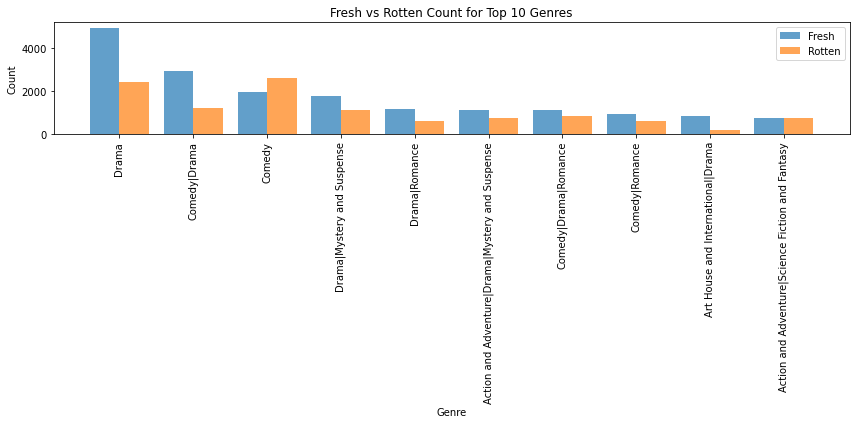

In [52]:
# Create a bar graph
plt.figure(figsize=(12, 6))

# Define the x positions for the bars
x = range(len(tomatodataSorted))

# Set the bar width
bar_width = 0.4

# Plot 'fresh_count' and 'rotten_count' as separate bars
plt.bar(x, tomatodataSorted['fresh_count'], width=bar_width, label='Fresh', alpha=0.7)
plt.bar([i + bar_width for i in x], tomatodataSorted['rotten_count'], width=bar_width, label='Rotten', alpha=0.7)

# Set the x-axis labels to be genre names
plt.xticks([i + bar_width/2 for i in x], tomatodataSorted['genre'], rotation=90)

plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Fresh vs Rotten Count for Top 10 Genres')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


## TMDB DATA

In [53]:
# Load the movie details DataFrame from a compressed CSV file
movies_details = pd.read_csv('zippedData\\tmdb.movies.csv.gz', compression='gzip', encoding='latin1')

# Select only the columns 'genre_ids', 'vote_average', and 'vote_count'
movies_details = movies_details[['genre_ids', 'vote_average', 'vote_count']]

# Display the first few rows of the DataFrame
movies_details.head()

,genre_ids,vote_average,vote_count
0,"[12, 14, 10751]",7.7,10788
1,"[14, 12, 16, 10751]",7.7,7610
2,"[12, 28, 878]",6.8,12368
3,"[16, 35, 10751]",7.9,10174
4,"[28, 878, 12]",8.3,22186


In [54]:
# Sort the DataFrame by the 'vote_average' column in descending order and get the top 10 elements
tmdbSoetedData = movies_details.sort_values(by=['vote_count', 'vote_average'], ascending=False).head(10)

# Display the top 10 movies
print(tmdbSoetedData)



               genre_ids  vote_average  vote_count
4          [28, 878, 12]           8.3       22186
17383       [28, 12, 35]           7.6       20175
5179       [878, 28, 12]           7.6       19673
6      [28, 12, 14, 878]           7.4       18676
11032      [12, 18, 878]           8.2       18597
11021      [28, 878, 12]           7.9       17958
5189            [18, 37]           8.0       15725
5235       [878, 12, 14]           7.1       14587
14177      [28, 12, 878]           7.4       14454
7881       [28, 12, 878]           6.9       14155


In [55]:
tmdbGenre = {28: 'Action',
 12: 'Adventure',
 16: 'Animation',
 35: 'Comedy',
 80: 'Crime',
 99: 'Documentary',
 18: 'Drama',
 10751: 'Family',
 14: 'Fantasy',
 36: 'History',
 27: 'Horror',
 10402: 'Music',
 9648: 'Mystery',
 10749: 'Romance',
 878: 'Science Fiction',
 10770: 'TV Movie',
 53: 'Thriller',
 10752: 'War',
 37: 'Western'}

In [56]:

tmdbSoetedData['genre_ids'] = tmdbSoetedData['genre_ids'].apply(lambda x: [tmdbGenre[i] for i in eval(x)])

print(tmdbSoetedData)


                                           genre_ids  vote_average  vote_count
4               [Action, Science Fiction, Adventure]           8.3       22186
17383                    [Action, Adventure, Comedy]           7.6       20175
5179            [Science Fiction, Action, Adventure]           7.6       19673
6      [Action, Adventure, Fantasy, Science Fiction]           7.4       18676
11032            [Adventure, Drama, Science Fiction]           8.2       18597
11021           [Action, Science Fiction, Adventure]           7.9       17958
5189                                [Drama, Western]           8.0       15725
5235           [Science Fiction, Adventure, Fantasy]           7.1       14587
14177           [Action, Adventure, Science Fiction]           7.4       14454
7881            [Action, Adventure, Science Fiction]           6.9       14155


In [57]:
# Sort the DataFrame by 'vote_average' in descending order and then by 'genre_ids' in ascending order
tmdbSoetedData = tmdbSoetedData.sort_values(by='vote_average', ascending=False)
tmdbSoetedData

,genre_ids,vote_average,vote_count
4,"[Action, Science Fiction, Adventure]",8.3,22186
11032,"[Adventure, Drama, Science Fiction]",8.2,18597
5189,"[Drama, Western]",8.0,15725
11021,"[Action, Science Fiction, Adventure]",7.9,17958
17383,"[Action, Adventure, Comedy]",7.6,20175
5179,"[Science Fiction, Action, Adventure]",7.6,19673
6,"[Action, Adventure, Fantasy, Science Fiction]",7.4,18676
14177,"[Action, Adventure, Science Fiction]",7.4,14454
5235,"[Science Fiction, Adventure, Fantasy]",7.1,14587
7881,"[Action, Adventure, Science Fiction]",6.9,14155


In [65]:
# Create a barplot
plt.figure(figsize=(12, 6))
sns.barplot( x='genre_ids', y='vote_average', data=tmdbSoetedData, palette='skyblue')
plt.xlabel('Average Vote')
plt.ylabel('Genre')
plt.title('Average Vote by Genre')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

TypeError: unhashable type: 'list'

<Figure size 864x432 with 0 Axes>

In [ ]:
movies_budgets = pd.read_csv('zippedData\\tn.movie_budgets.csv.gz', compression='gzip', encoding='latin1')
movies_budgets.head()

In [ ]:
movie_gross = pd.read_csv('zippedData\\bom.movie_gross.csv.gz', compression='gzip', encoding='latin1')
movie_gross.head()

In [ ]:
with zipfile.ZipFile('zippedData\im.db.zip', 'r') as zip_file:
    zip_file.extractall()

conn = sqlite3.connect('im.db')
persons = pd.read_sql("SELECT * FROM persons;", conn)
movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)
movie_aka = pd.read_sql("SELECT * FROM movie_akas;", conn)
writers = pd.read_sql("SELECT * FROM writers;", conn)
directors = pd.read_sql("SELECT * FROM directors;", conn)
known_for = pd.read_sql("SELECT * FROM known_for;", conn)
principals = pd.read_sql("SELECT * FROM principals;", conn)

conn.close()

In [ ]:
movie_basics.head()

In [ ]:
movie_ratings.head()

In [ ]:
movie_gross.head()

In [ ]:
tmdbGenre = {28: 'Action',
 12: 'Adventure',
 16: 'Animation',
 35: 'Comedy',
 80: 'Crime',
 99: 'Documentary',
 18: 'Drama',
 10751: 'Family',
 14: 'Fantasy',
 36: 'History',
 27: 'Horror',
 10402: 'Music',
 9648: 'Mystery',
 10749: 'Romance',
 878: 'Science Fiction',
 10770: 'TV Movie',
 53: 'Thriller',
 10752: 'War',
 37: 'Western'}

In [ ]:
movies_details['genre_ids'][0].
